<a href="https://colab.research.google.com/github/arjunsumina/analytics_code/blob/main/MS6107E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*Coded by Arjun Anil Kumar*
*Date - 18 October 2023*

**Goal of this project**
To predict the median value of owner-occupied based on 13 features. The customer has given you a dataset of size 506 with 14 columns (13 independent variables and 1 dependent variable)

**Features list or Independent Variables** </br>
0-CRIM: Per capita crime rate by town</br>
1-ZN: Proportion of residential land zoned for lots over 25,000 sq. ft</br>
2-INDUS: Proportion of non-retail business acres per town</br>
3-CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4-NOX: Nitric oxide concentration (parts per 10 million)</br>
5-RM: Average number of rooms per dwelling</br>
6-AGE: Proportion of owner-occupied units built prior to 1940</br>
7-DIS: Weighted distances to five Boston employment centers</br>
8-RAD: Index of accessibility to radial highways</br>
9-TAX: Full-value property tax rate per $10,000</br>
10-PTRATIO: Pupil-teacher ratio by town</br>
11-B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town</br>
12-LSTAT: Percentage of lower status of the population</br>


**Dependent Variable**
MEDV: Median value of owner-occupied homes in $1000s</br>

#Project - House Prediction Problem

**STAGE 1**
Load the data and do the **DESCRIPTIVE STATISTICS**


In [55]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

Methodology - Multiple Linear Regression MLR </br>
The data set will be divided into training data and testing data </br>
Training data is for estimating the parameters of the model </br>
Testing data is for understanding how the estimated model performs </br>

In [56]:
print('The number of features of testing data is',test_data.shape[1])
print('The number of features of training data is',train_data.shape[1])
print('The number of observations of testing data is',test_data.shape[0])
print('The number of observations of training data is',train_data.shape[0])



The number of features of testing data is 13
The number of features of training data is 13
The number of observations of testing data is 102
The number of observations of training data is 404


In [57]:
type(train_data)

numpy.ndarray

Descriptive Statistics

In [58]:
import pandas as pd
train_data_x_df = pd.DataFrame(train_data)
test_data_x_df = pd.DataFrame(test_data)

print('Summary Statistics - Independent Variables \n')
print(train_data_x_df.describe())

train_targets_y_df = pd.DataFrame(train_targets)
test_targets_y_df = pd.DataFrame(test_targets)

print('\n Summary Statistics - Dependent Variables')
print(train_targets_y_df.describe())


Summary Statistics - Independent Variables 

               0           1           2           3           4           5   \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.745111   11.480198   11.104431    0.061881    0.557356    6.267082   
std      9.240734   23.767711    6.811308    0.241238    0.117293    0.709788   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081437    0.000000    5.130000    0.000000    0.453000    5.874750   
50%      0.268880    0.000000    9.690000    0.000000    0.538000    6.198500   
75%      3.674808   12.500000   18.100000    0.000000    0.631000    6.609000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.725000   

               6           7           8           9           10          11  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.010644    3.740271    9.440594  405.898515   18.4759

**STAGE 2**
**EXPLORATORY ANALYSIS**

In [59]:
# Exploratory Analysis
train_data_df = pd.concat([train_data_x_df, train_targets_y_df], axis=1, join='inner')
print('Data before naming columns')
print(train_data_df)
train_data_df.columns = ['CRIM', 'ZN', 'IND','CHA','NOX','RM','AGE','DIS','RAD','TAX','PTR','AFA','LSTA','MED_PRICE']
print('Data after naming columns')
print(train_data_df)
train_data_df.columns



Data before naming columns
          0     1      2    3       4      5      6       7     8      9   \
0    1.23247   0.0   8.14  0.0  0.5380  6.142   91.7  3.9769   4.0  307.0   
1    0.02177  82.5   2.03  0.0  0.4150  7.610   15.7  6.2700   2.0  348.0   
2    4.89822   0.0  18.10  0.0  0.6310  4.970  100.0  1.3325  24.0  666.0   
3    0.03961   0.0   5.19  0.0  0.5150  6.037   34.5  5.9853   5.0  224.0   
4    3.69311   0.0  18.10  0.0  0.7130  6.376   88.4  2.5671  24.0  666.0   
..       ...   ...    ...  ...     ...    ...    ...     ...   ...    ...   
399  0.21977   0.0   6.91  0.0  0.4480  5.602   62.0  6.0877   3.0  233.0   
400  0.16211  20.0   6.96  0.0  0.4640  6.240   16.3  4.4290   3.0  223.0   
401  0.03466  35.0   6.06  0.0  0.4379  6.031   23.3  6.6407   1.0  304.0   
402  2.14918   0.0  19.58  0.0  0.8710  5.709   98.5  1.6232   5.0  403.0   
403  0.01439  60.0   2.93  0.0  0.4010  6.604   18.8  6.2196   1.0  265.0   

       10      11     12    0   
0    21.0  396.

Index(['CRIM', 'ZN', 'IND', 'CHA', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTR', 'AFA', 'LSTA', 'MED_PRICE'],
      dtype='object')

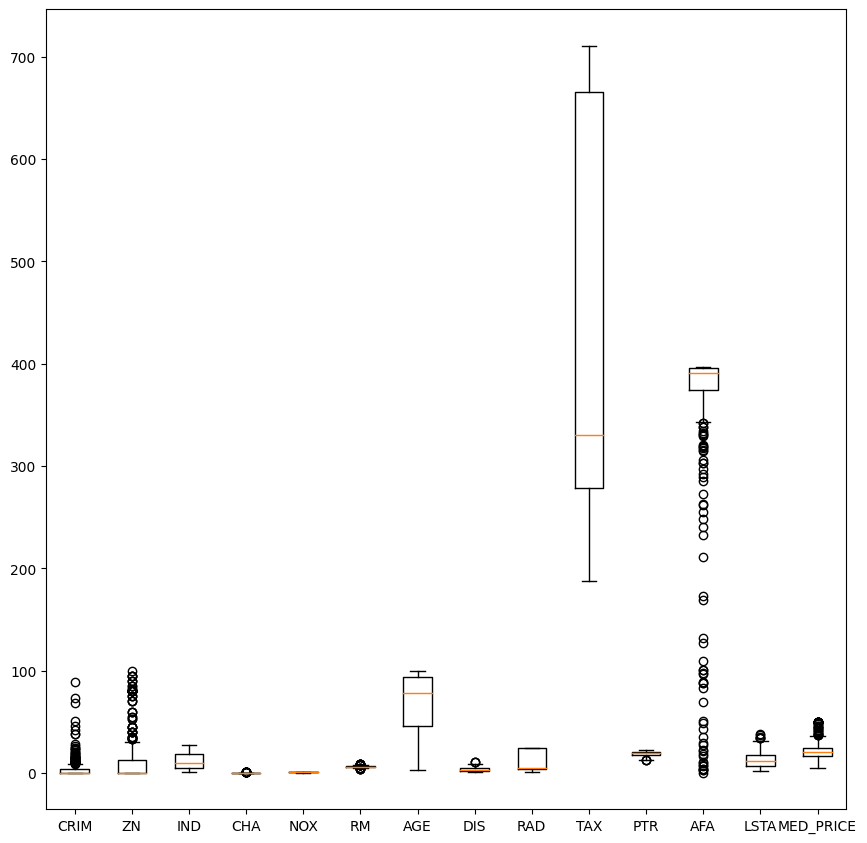

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(8, 8))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(train_data_df)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12,13,14],train_data_df.columns)

# show plot
plt.show()

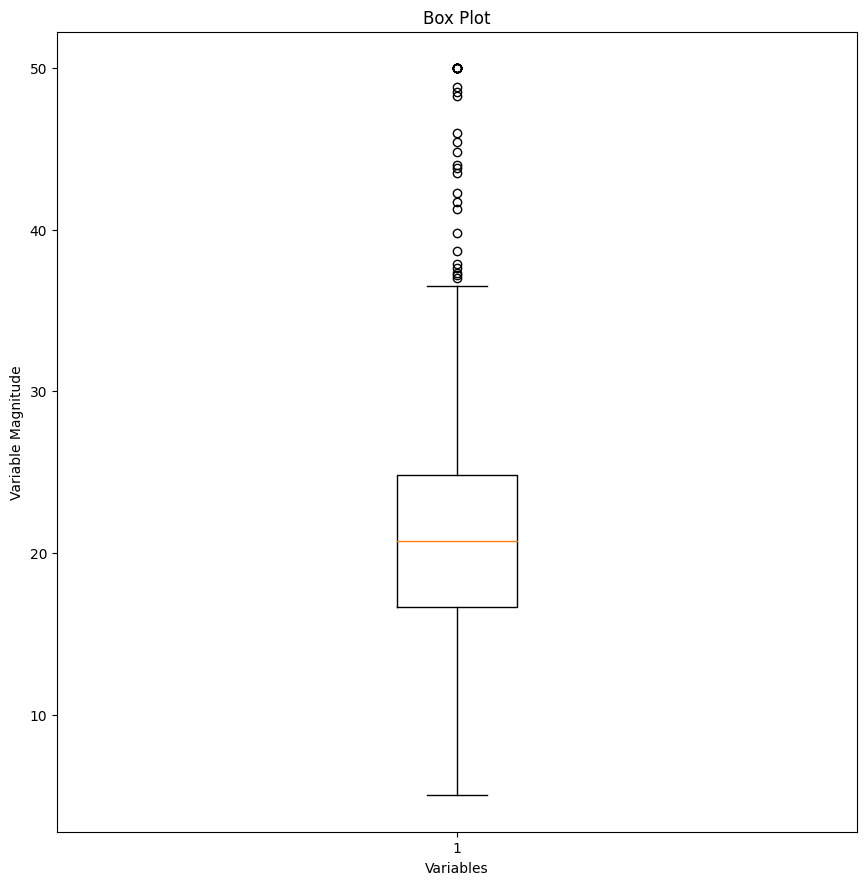

In [61]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(8, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Box Plot')
ax.set_xlabel('Variables')
ax.set_ylabel('Variable Magnitude')
# Creating plot
bp = ax.boxplot(train_data_df['MED_PRICE'])
# show plot

plt.show()

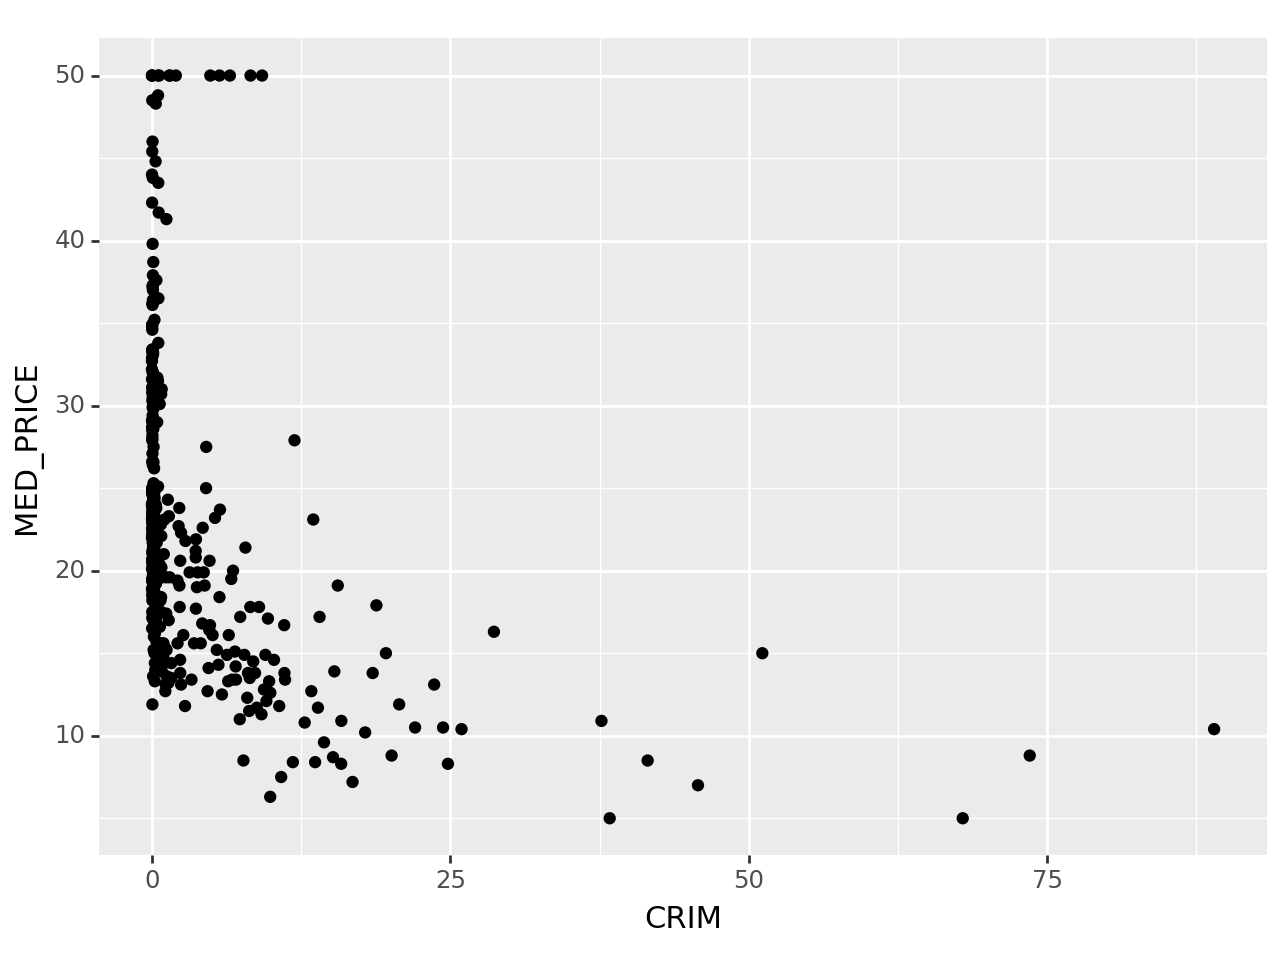

<Figure Size: (640 x 480)>

In [62]:
#!pip install pandas plotnine
from plotnine import *
ggplot(train_data_df, aes(x='CRIM', y='MED_PRICE')) + geom_point()



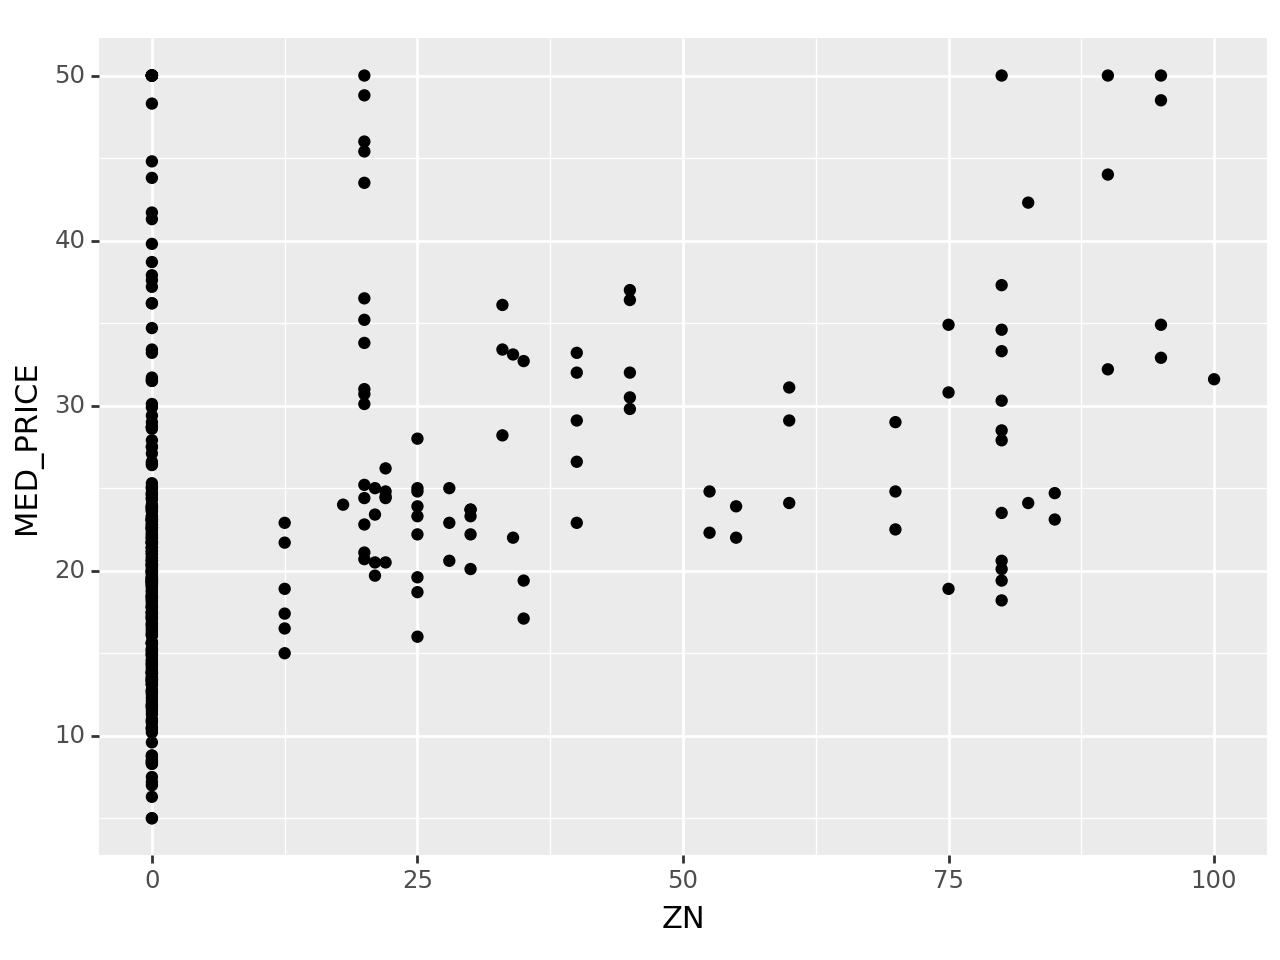

<Figure Size: (640 x 480)>

In [63]:
ggplot(train_data_df, aes(x='ZN', y='MED_PRICE')) + geom_point()


**STAGE 3** -
CORRELATION ANALYSIS




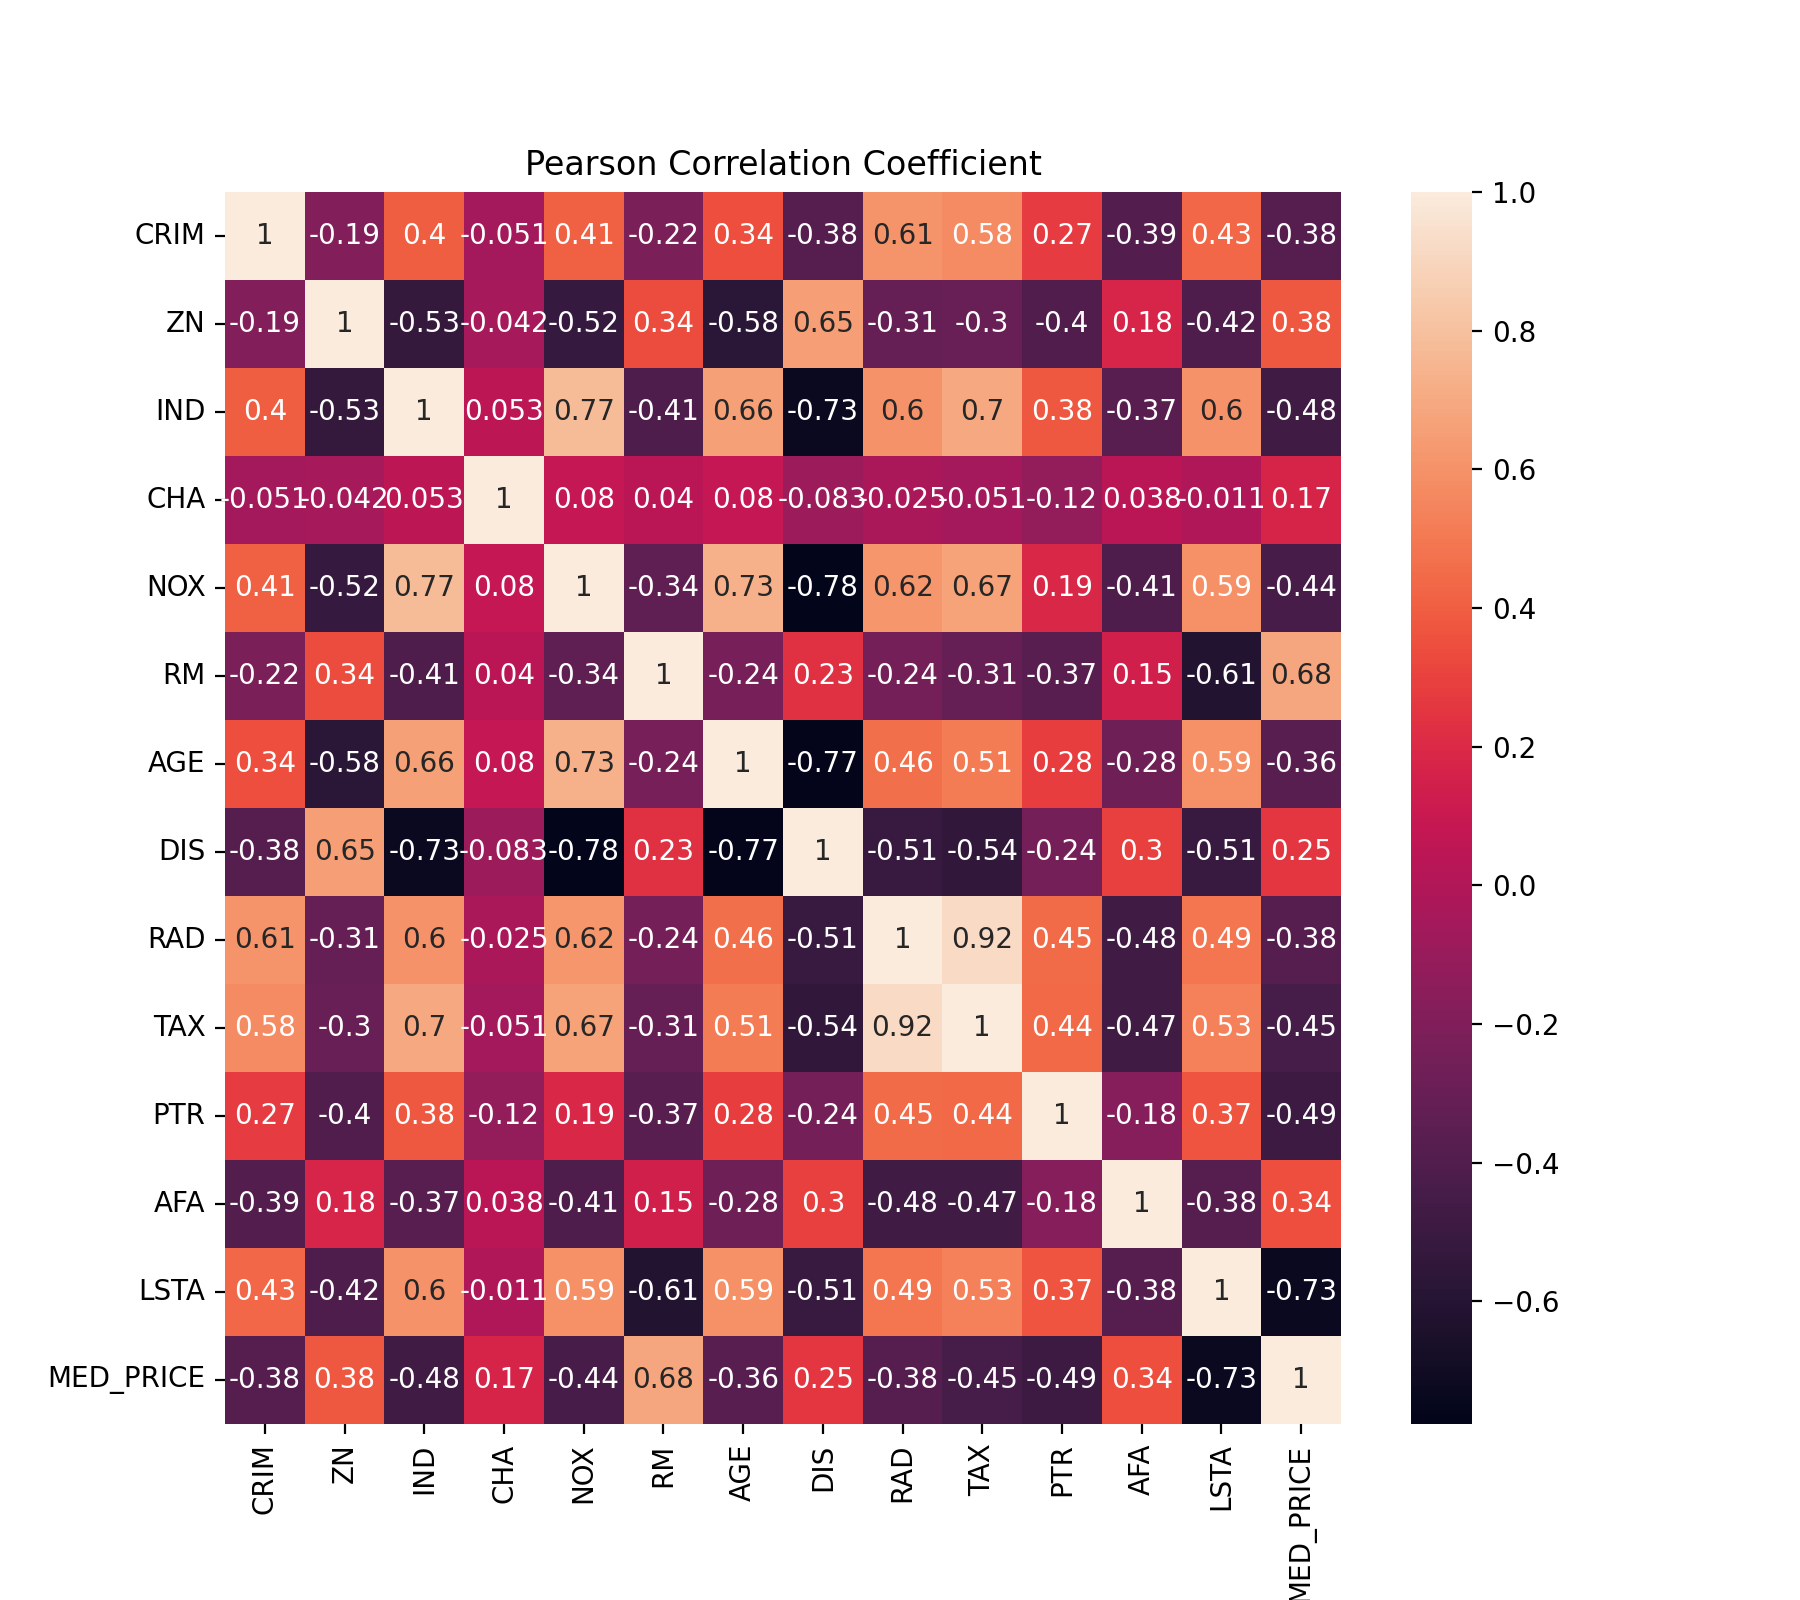

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
#plotting the heatmap for correlation
plt.figure(figsize = (9,8))
sns.heatmap(train_data_df.corr(), annot=True)
plt.title('Pearson Correlation Coefficient')
plt.show ()

**STAGE 4**
MULTIPLE LINEAR REGRESSION **MODEL**

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(train_data_x_df, train_targets_y_df)

LinearRegression()

In [66]:
#display regression coefficients and R-squared value of model
print(lin_model.intercept_, lin_model.coef_, lin_model.score(train_data_x_df, train_targets_y_df))

[40.29367058] [[-1.19997513e-01  5.70003304e-02  3.98379660e-03  4.12698187e+00
  -2.05002963e+01  3.38024903e+00  7.56807584e-03 -1.71189793e+00
   3.34747537e-01 -1.17797225e-02 -9.02318039e-01  8.71912756e-03
  -5.55842510e-01]] 0.7399643695249463


In [67]:
import statsmodels.api as sm
#define response variable
y = train_data_df['MED_PRICE']
#define predictor variables
x = train_data_df.loc[:, train_data_df.columns != 'MED_PRICE']
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              MED_PRICE   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     85.37
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.46e-105
Time:                        17:13:08   Log-Likelihood:                -1197.7
No. Observations:                 404   AIC:                             2423.
Df Residuals:                     390   BIC:                             2479.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.2937      5.811      6.935      0.0

In [68]:
# model evaluation for training set
import numpy as np
y_train_predict = lin_model.predict(train_data_x_df)
rmse = (np.sqrt(mean_squared_error(train_targets_y_df, y_train_predict)))
print('Root Mean Square Error - Training',rmse)
r2 = r2_score(train_targets_y_df, y_train_predict)
print('R2 of the linear regression model - Training :',r2)





Root Mean Square Error - Training 4.6909275029942785
R2 of the linear regression model - Training : 0.7399643695249463


In [69]:
# model evaluation for training set
import numpy as np
y_test_predict = lin_model.predict(test_data_x_df)
rmse = (np.sqrt(mean_squared_error(test_targets_y_df, y_test_predict)))
print('Root Mean Square Error - Testing',rmse)
r2 = r2_score(test_targets_y_df, y_test_predict)
print('R2 of the linear regression model - Testing :',r2)

Root Mean Square Error - Testing 4.816180982523704
R2 of the linear regression model - Testing : 0.7213535934621551


**STAGE 5**
RESIDUAL ERROR ANALYSIS **MODEL**

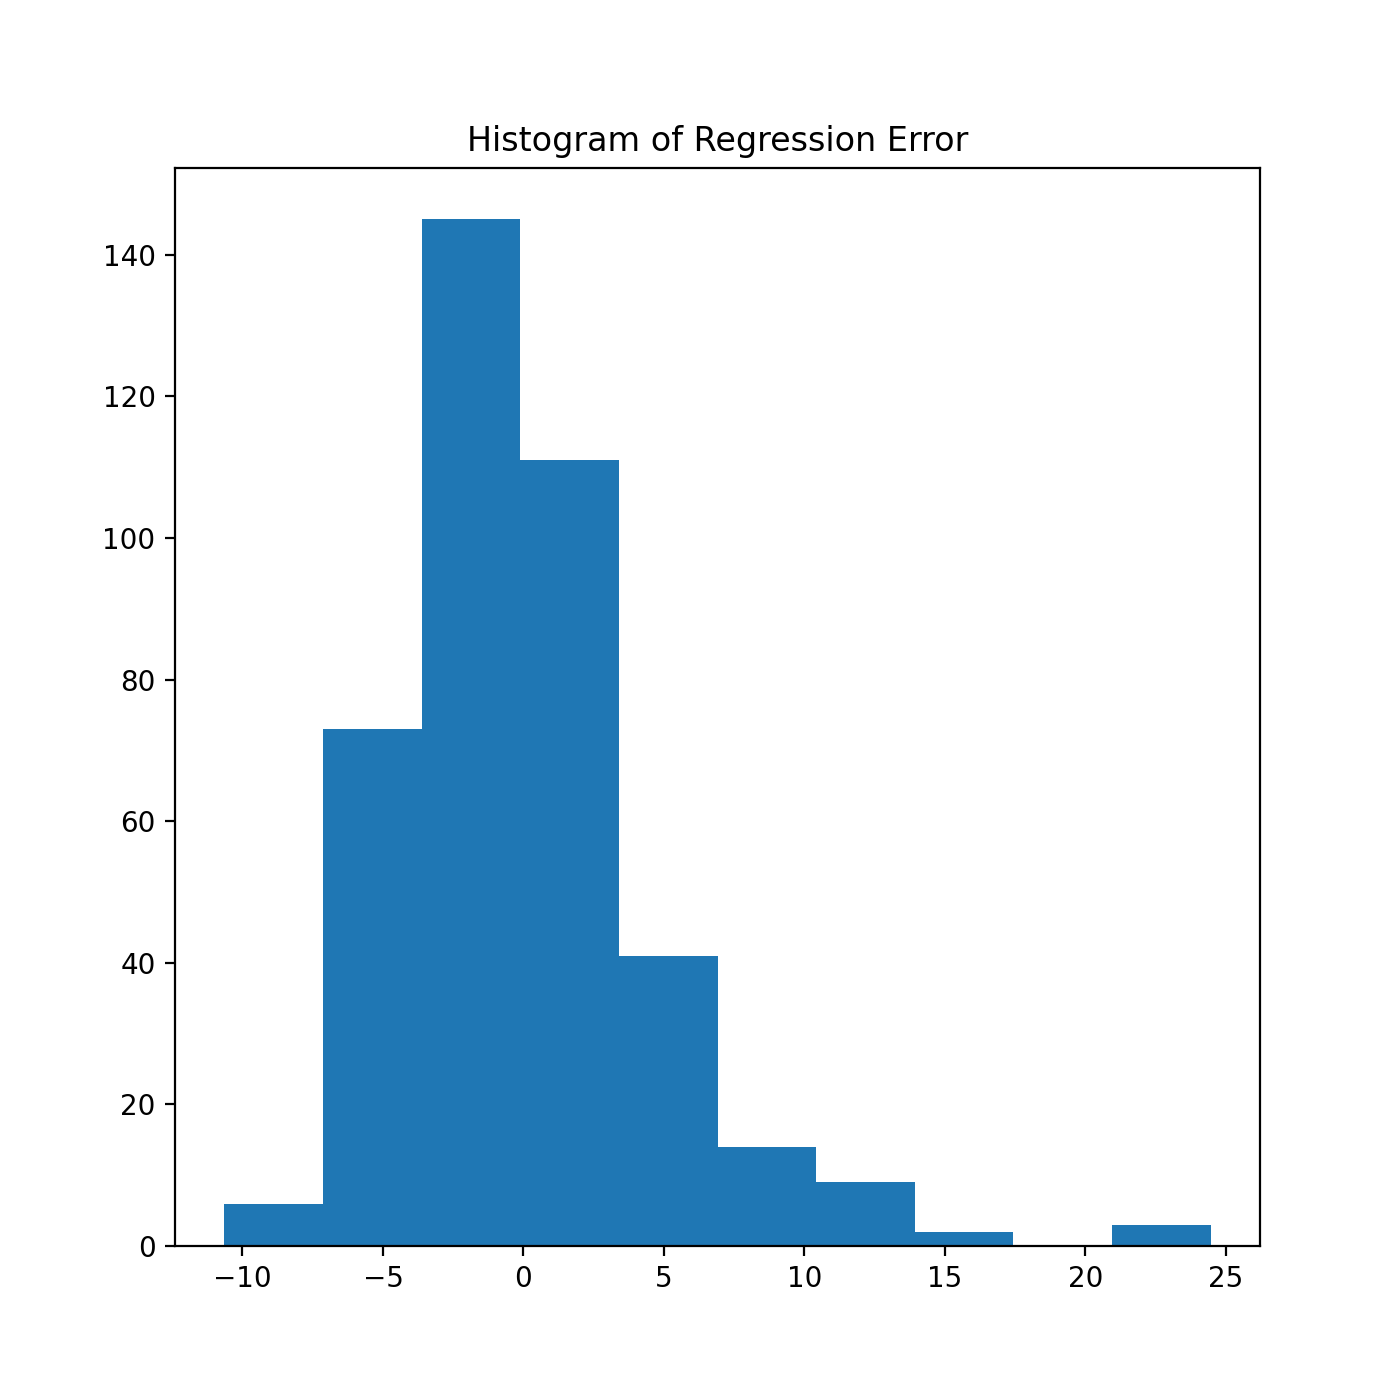

In [70]:
# model evaluation for training set
import numpy as np
y_train_predict = lin_model.predict(train_data_x_df)
model_error = train_targets_y_df -  y_train_predict
# Creating histogram
fig, ax = plt.subplots(figsize =(7, 7))
ax.hist(model_error)
# Show plot
plt.title('Histogram of Regression Error')
plt.show()

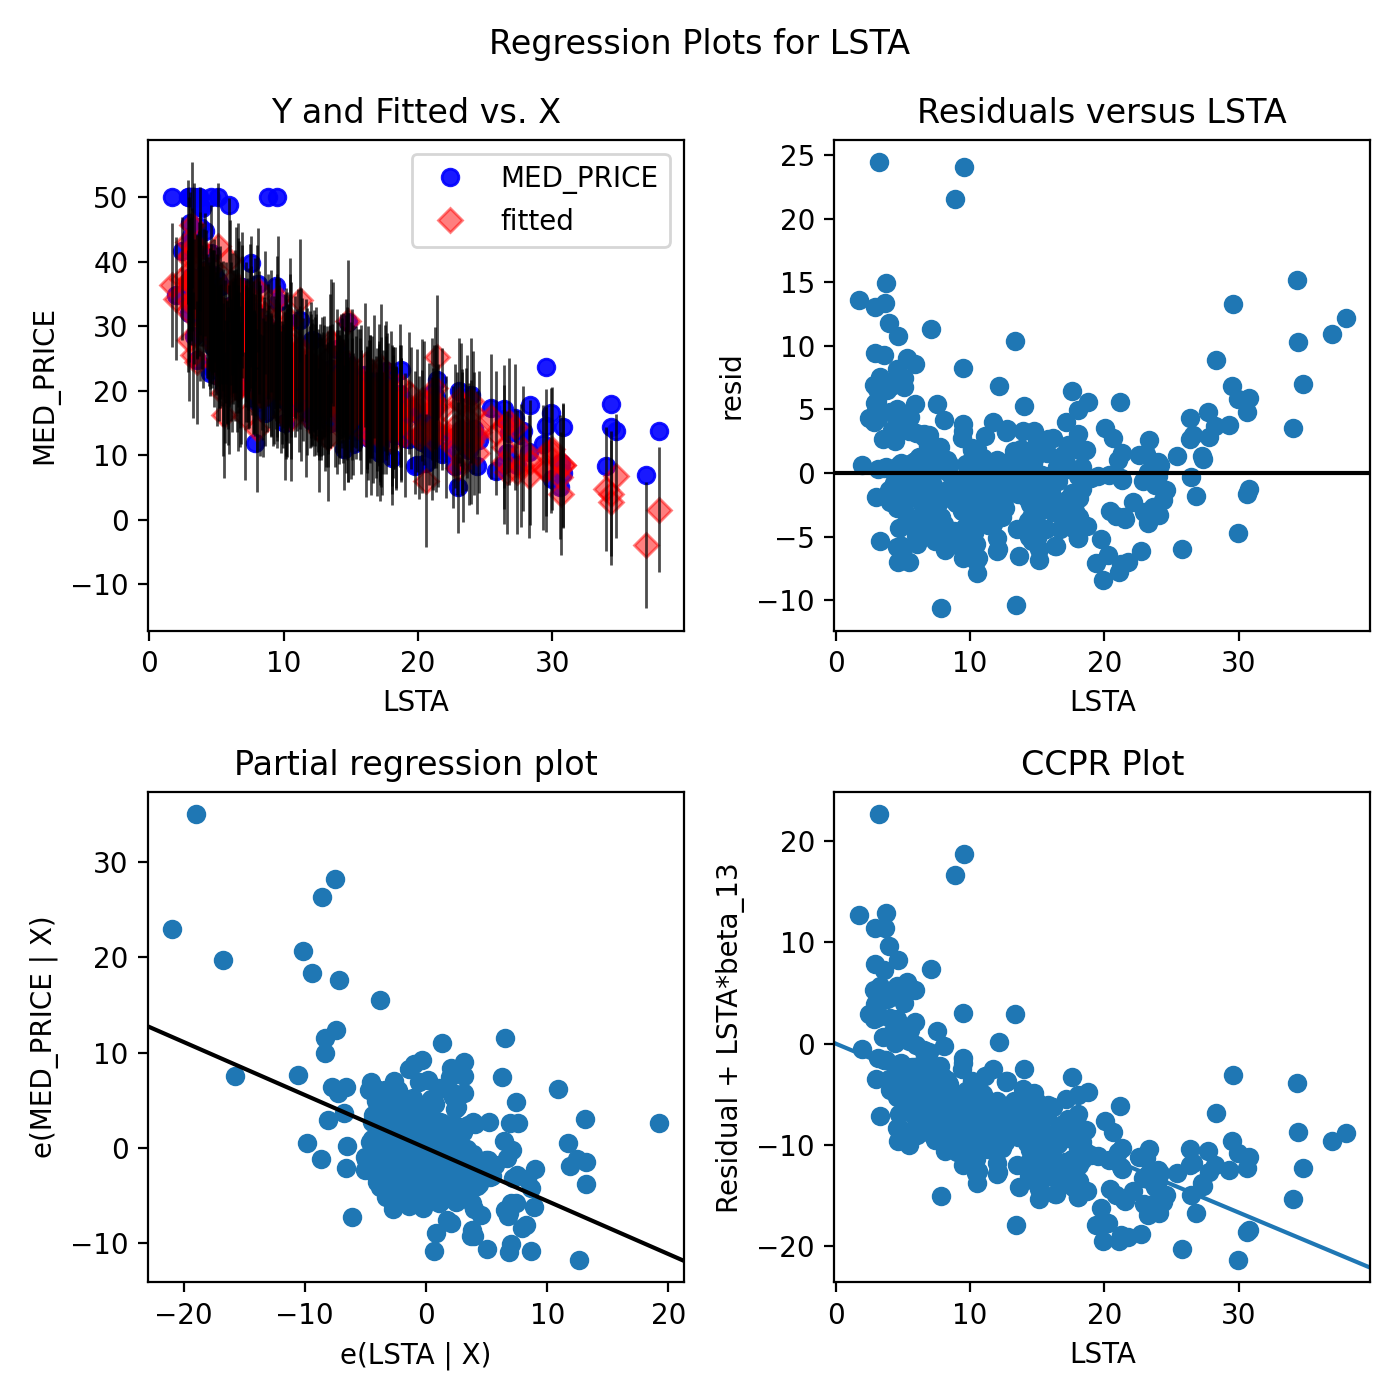

In [71]:
import statsmodels.api as sm
#define response variable
y = train_data_df['MED_PRICE']
#define predictor variables
x = train_data_df.loc[:, train_data_df.columns != 'MED_PRICE']
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
#print(model.summary())
# modify figure size
fig = plt.figure(figsize=(7, 7))
# creating regression plots
fig = sm.graphics.plot_regress_exog(model, 'LSTA', fig=fig)


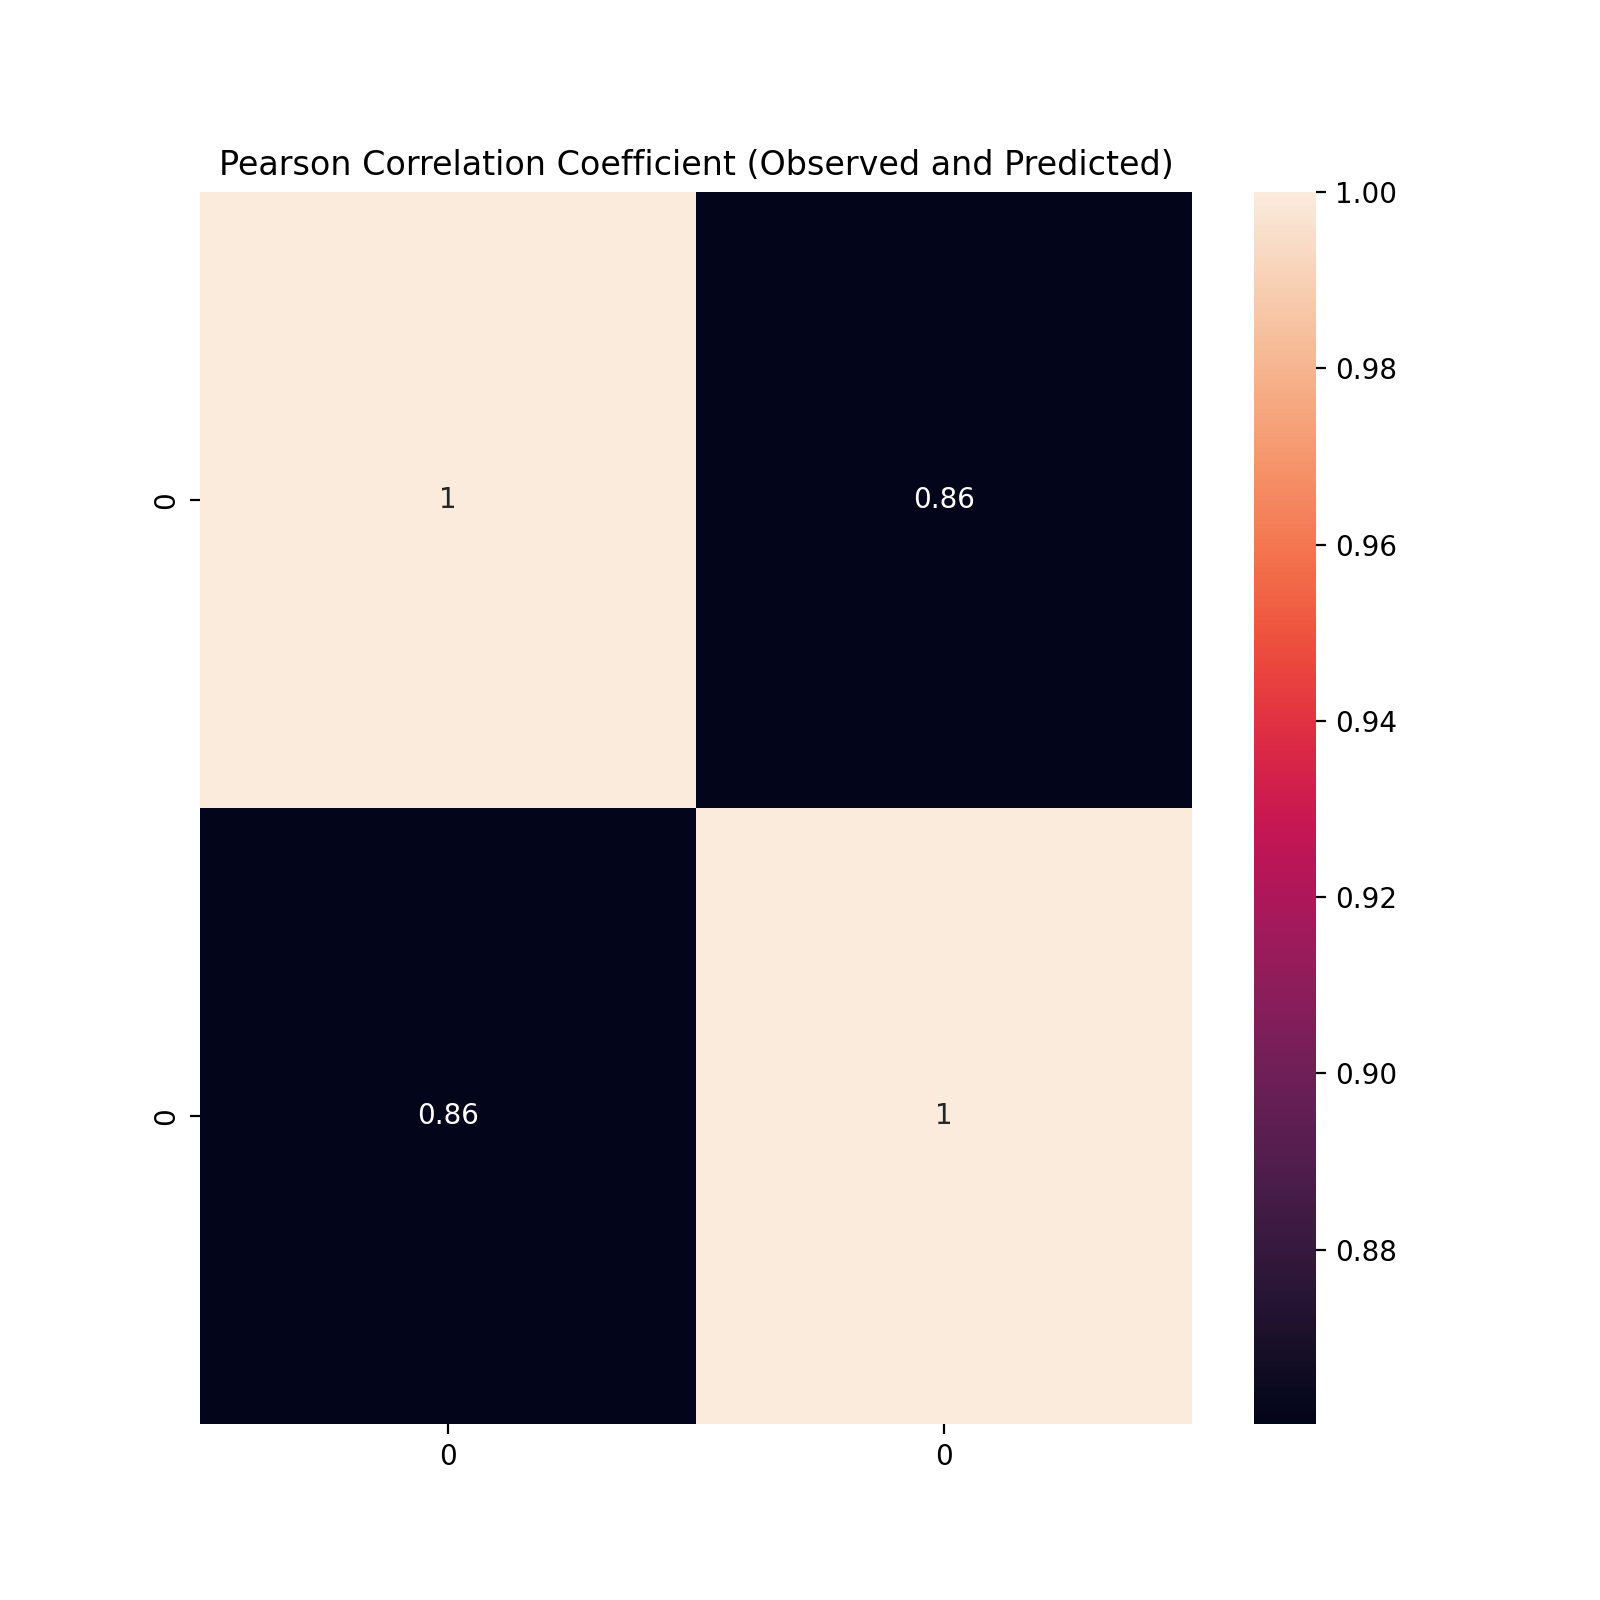

In [72]:
observed_df = pd.DataFrame(train_targets_y_df)
predicted_df = pd.DataFrame(y_train_predict)
predicted_observed_df = pd.concat([observed_df, predicted_df], axis=1, join='inner')
import seaborn as sns
import matplotlib.pyplot as plt
#plotting the heatmap for correlation
plt.figure(figsize = (8,8))
sns.heatmap(predicted_observed_df.corr(), annot=True)
plt.title('Pearson Correlation Coefficient (Observed and Predicted)')
plt.show()